Cargar las librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


Subir tu archivo

In [16]:
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0], skiprows=1)
df.head()

Saving dataset.csv to dataset (2).csv


,fecha,lluvia,luz,viento,temperatura,humedad
0,2025-12-04 16:00:00,100,200.0,1.5,22.0,60
1,2025-12-04 16:00:00,100,200.0,1.5,22.0,1000
2,2025-12-04 16:00:00,100,200.0,1.5,22.0,-100
3,2025-12-04 16:00:00,100,200.0,1.5,22.0,-200
4,2025-12-04 16:00:00,100,200.0,1.5,22.0,-100


Limpiar nombres

In [17]:
df.columns = df.columns.str.strip().str.lower()

Convertimos fecha

In [18]:
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')

Limpiamos datos

In [19]:
df_clean = df[
    (df['humedad'] >= 0) & (df['humedad'] <= 100) &
    (df['temperatura'] >= -20) & (df['temperatura'] <= 60) &
    (df['lluvia'] >= 0) &
    (df['luz'] >= 0) &
    (df['viento'] >= 0)
].copy()

df_clean.head()

,fecha,lluvia,luz,viento,temperatura,humedad
0,2025-12-04 16:00:00,100,200.00,1.5,22.0,60
5,2025-12-04 15:44:54,4095,19.17,0.0,19.4,50
6,2025-12-04 15:45:03,4095,13.33,0.0,19.4,50
7,2025-12-04 15:45:11,4095,13.33,0.0,19.4,50
8,2025-12-04 15:45:20,4095,15.00,0.0,19.4,50


Extraer la hora del día de cada registro

In [21]:
df_clean['hora'] = df_clean['fecha'].dt.hour
df_clean.head()



,fecha,lluvia,luz,viento,temperatura,humedad,hora
0,2025-12-04 16:00:00,100,200.00,1.5,22.0,60,16
5,2025-12-04 15:44:54,4095,19.17,0.0,19.4,50,15
6,2025-12-04 15:45:03,4095,13.33,0.0,19.4,50,15
7,2025-12-04 15:45:11,4095,13.33,0.0,19.4,50,15
8,2025-12-04 15:45:20,4095,15.00,0.0,19.4,50,15


Informacoón de tipos de datos

In [22]:
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934 entries, 0 to 1933
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   fecha        1934 non-null   datetime64[ns]
 1   lluvia       1934 non-null   int64         
 2   luz          1934 non-null   float64       
 3   viento       1934 non-null   float64       
 4   temperatura  1934 non-null   float64       
 5   humedad      1934 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 90.8 KB


Vista de tipos de datos

In [23]:

for col in ['lluvia','luz','viento','temperatura','humedad']:
    print(f"\n===== COLUMNA: {col} =====")

    print("ANTES:")
    print("Tipo:", df[col].dtype)
    print(df[col].head(5))

    df[col] = pd.to_numeric(df[col], errors='coerce')

    print("DESPUÉS:")
    print("Tipo:", df[col].dtype)
    print(df[col].head(5))



===== COLUMNA: lluvia =====
ANTES:
Tipo: int64
0    100
1    100
2    100
3    100
4    100
Name: lluvia, dtype: int64
DESPUÉS:
Tipo: int64
0    100
1    100
2    100
3    100
4    100
Name: lluvia, dtype: int64

===== COLUMNA: luz =====
ANTES:
Tipo: float64
0    200.0
1    200.0
2    200.0
3    200.0
4    200.0
Name: luz, dtype: float64
DESPUÉS:
Tipo: float64
0    200.0
1    200.0
2    200.0
3    200.0
4    200.0
Name: luz, dtype: float64

===== COLUMNA: viento =====
ANTES:
Tipo: float64
0    1.5
1    1.5
2    1.5
3    1.5
4    1.5
Name: viento, dtype: float64
DESPUÉS:
Tipo: float64
0    1.5
1    1.5
2    1.5
3    1.5
4    1.5
Name: viento, dtype: float64

===== COLUMNA: temperatura =====
ANTES:
Tipo: float64
0    22.0
1    22.0
2    22.0
3    22.0
4    22.0
Name: temperatura, dtype: float64
DESPUÉS:
Tipo: float64
0    22.0
1    22.0
2    22.0
3    22.0
4    22.0
Name: temperatura, dtype: float64

===== COLUMNA: humedad =====
ANTES:
Tipo: int64
0      60
1    1000
2    -100
3    -200

Filtrado de datos invalidos

In [24]:
print("Filas originales:", len(df))


df_clean = df.copy()
cond_notna = (
    df_clean['humedad'].notna() &
    df_clean['temperatura'].notna() &
    df_clean['lluvia'].notna() &
    df_clean['luz'].notna() &
    df_clean['viento'].notna()
)

df_step1 = df_clean[cond_notna].copy()

print("Filas después de remover NaN:", len(df_step1))
print("Filas eliminadas por NaN:", len(df) - len(df_step1))
cond_valid = (
    (df_step1['humedad'] >= 0) & (df_step1['humedad'] <= 100) &
    (df_step1['temperatura'] >= -40) & (df_step1['temperatura'] <= 60) &
    (df_step1['lluvia'] >= 0) &
    (df_step1['luz'] >= 0) &
    (df_step1['viento'] >= 0)
)

df_clean = df_step1[cond_valid].copy()

print("Filas finales después de limpieza:", len(df_clean))
print("Filas eliminadas por valores inválidos:", len(df_step1) - len(df_clean))

print("\nMostrando filas eliminadas por reglas de plausibilidad:")
df_invalid = df_step1[~cond_valid]
print(df_invalid.head(10))


Filas originales: 1934
Filas después de remover NaN: 1934
Filas eliminadas por NaN: 0
Filas finales después de limpieza: 1925
Filas eliminadas por valores inválidos: 9

Mostrando filas eliminadas por reglas de plausibilidad:
                   fecha  lluvia    luz  viento  temperatura  humedad
1    2025-12-04 16:00:00     100  200.0     1.5         22.0     1000
2    2025-12-04 16:00:00     100  200.0     1.5         22.0     -100
3    2025-12-04 16:00:00     100  200.0     1.5         22.0     -200
4    2025-12-04 16:00:00     100  200.0     1.5         22.0     -100
278  2025-12-04 16:00:00     100  200.0     1.5         22.0     1000
1710 2025-12-04 21:01:06     624   -1.0     0.0          7.7       89
1711 2025-12-04 21:01:14     630   -1.0     0.0          7.7       89
1715 2025-12-04 21:01:57     643   -1.0     0.0          7.6       89
1735 2025-12-04 21:05:48     709   -1.0     0.0          7.6       89


Analisis por hora y dia

In [25]:
df_clean['hora'] = df_clean['fecha'].dt.hour
df_clean['fecha_fecha'] = df_clean['fecha'].dt.date

print("Filas después limpieza:", len(df_clean))
display(df_clean.head())


Filas después limpieza: 1925


,fecha,lluvia,luz,viento,temperatura,humedad,hora,fecha_fecha
0,2025-12-04 16:00:00,100,200.00,1.5,22.0,60,16,2025-12-04
5,2025-12-04 15:44:54,4095,19.17,0.0,19.4,50,15,2025-12-04
6,2025-12-04 15:45:03,4095,13.33,0.0,19.4,50,15,2025-12-04
7,2025-12-04 15:45:11,4095,13.33,0.0,19.4,50,15,2025-12-04
8,2025-12-04 15:45:20,4095,15.00,0.0,19.4,50,15,2025-12-04


Graficas

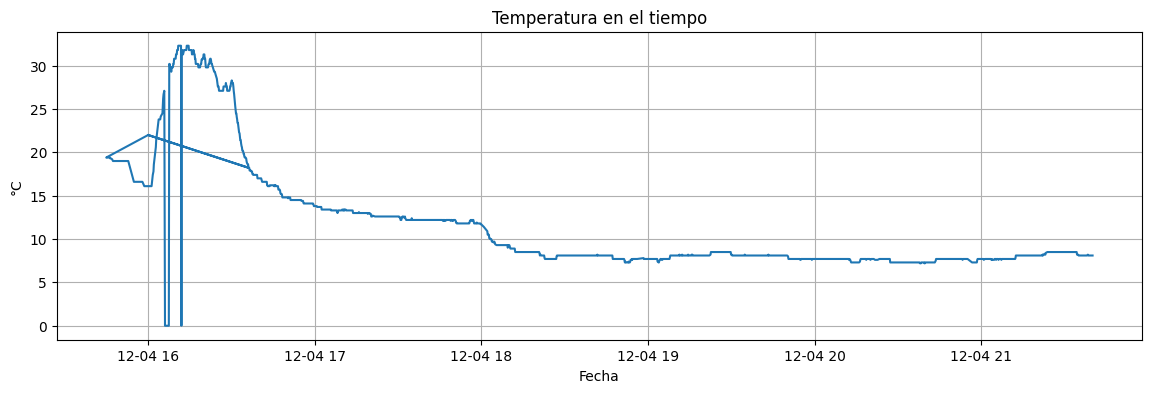

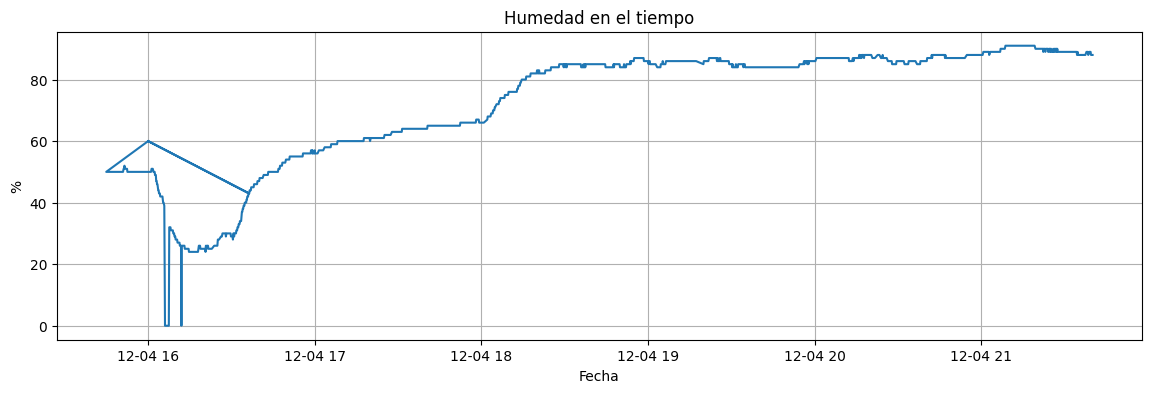

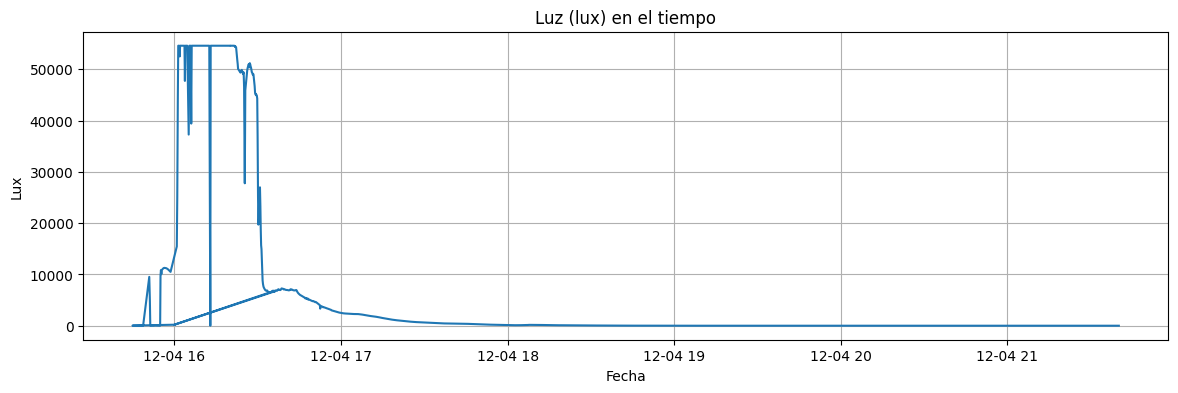

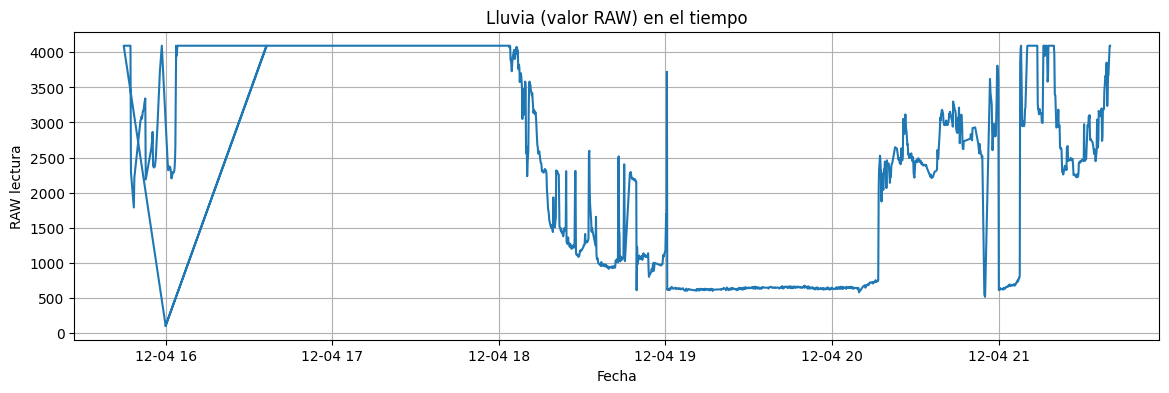

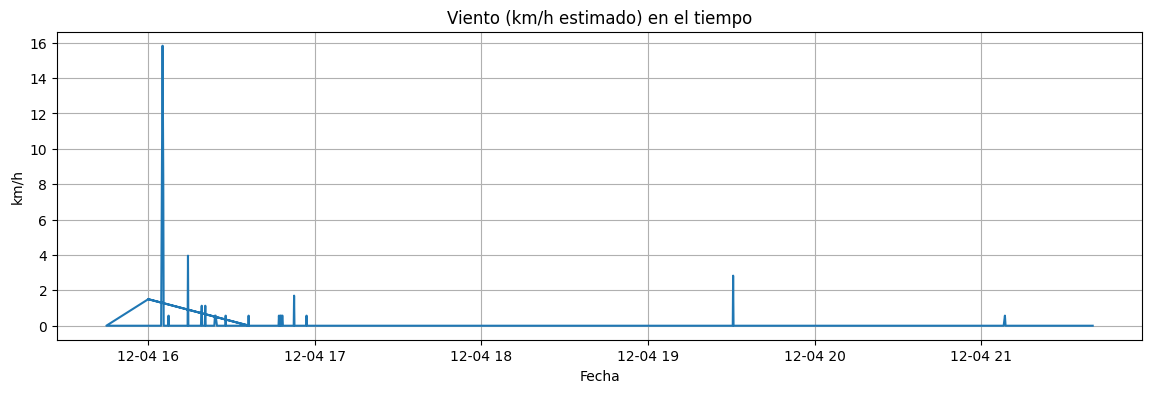

In [26]:
plt.figure(figsize=(14,4))
plt.plot(df_clean['fecha'], df_clean['temperatura'])
plt.title("Temperatura en el tiempo")
plt.xlabel("Fecha")
plt.ylabel("°C")
plt.grid(True)
plt.show()

plt.figure(figsize=(14,4))
plt.plot(df_clean['fecha'], df_clean['humedad'])
plt.title("Humedad en el tiempo")
plt.xlabel("Fecha")
plt.ylabel("%")
plt.grid(True)
plt.show()

plt.figure(figsize=(14,4))
plt.plot(df_clean['fecha'], df_clean['luz'])
plt.title("Luz (lux) en el tiempo")
plt.xlabel("Fecha")
plt.ylabel("Lux")
plt.grid(True)
plt.show()

plt.figure(figsize=(14,4))
plt.plot(df_clean['fecha'], df_clean['lluvia'])
plt.title("Lluvia (valor RAW) en el tiempo")
plt.xlabel("Fecha")
plt.ylabel("RAW lectura")
plt.grid(True)
plt.show()

plt.figure(figsize=(14,4))
plt.plot(df_clean['fecha'], df_clean['viento'])
plt.title("Viento (km/h estimado) en el tiempo")
plt.xlabel("Fecha")
plt.ylabel("km/h")
plt.grid(True)
plt.show()

Promedio por hora

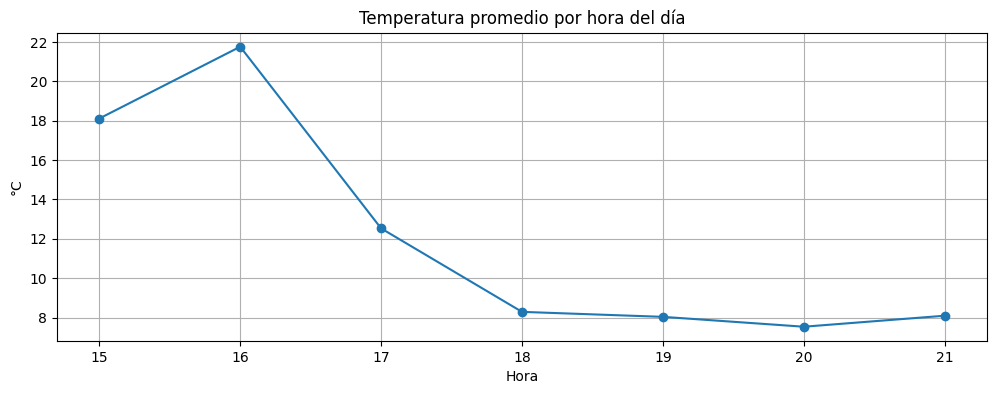

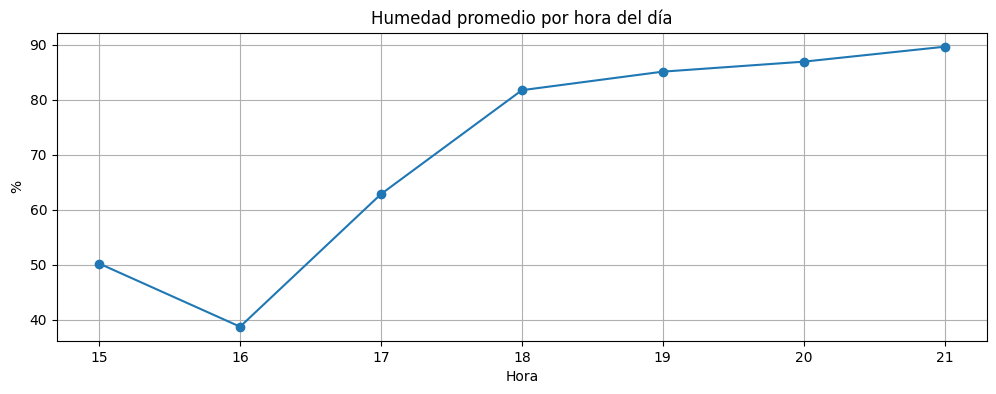

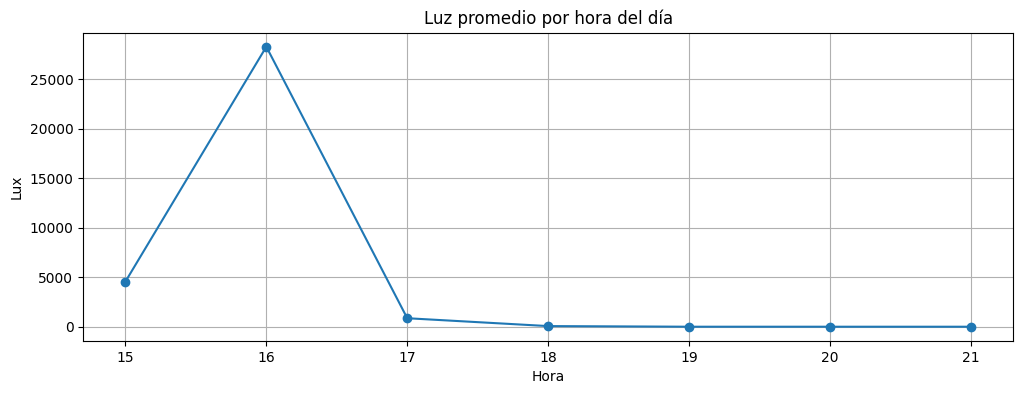

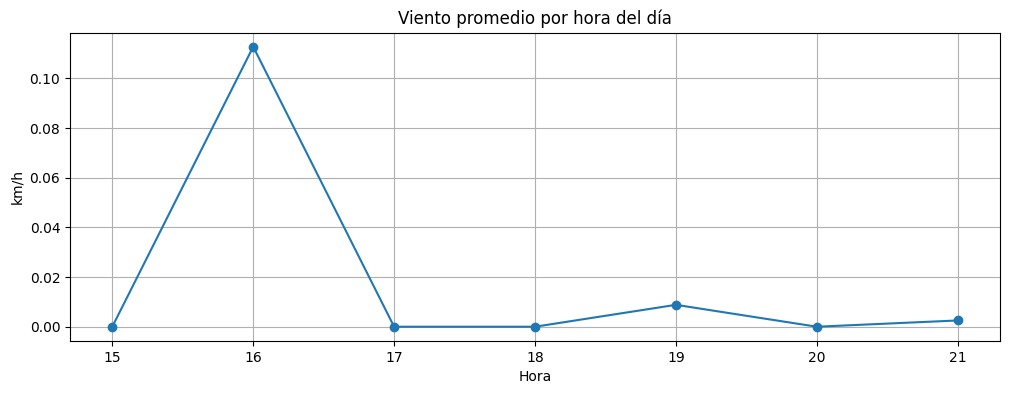

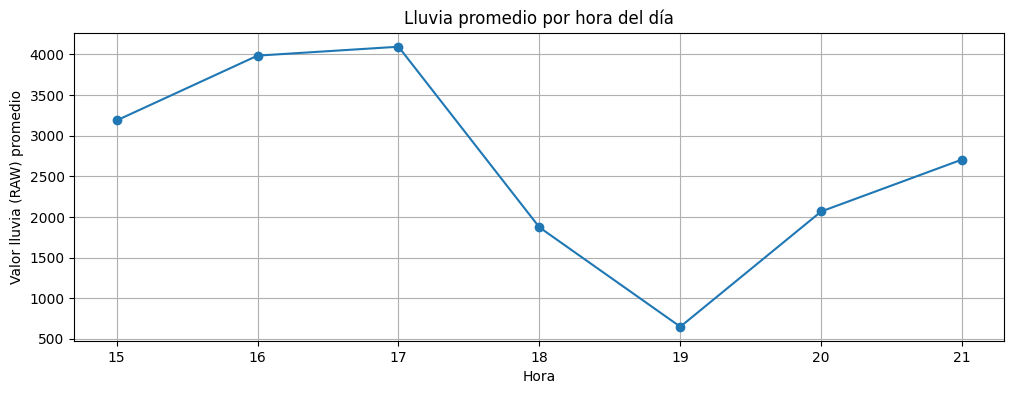

In [31]:

prom_hora = df_clean.groupby('hora')[['temperatura','humedad','luz','lluvia','viento']].mean()

plt.figure(figsize=(12,4))
plt.plot(prom_hora.index, prom_hora['temperatura'], marker='o')
plt.title("Temperatura promedio por hora del día")
plt.xlabel("Hora")
plt.ylabel("°C")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(prom_hora.index, prom_hora['humedad'], marker='o')
plt.title("Humedad promedio por hora del día")
plt.xlabel("Hora")
plt.ylabel("%")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(prom_hora.index, prom_hora['luz'], marker='o')
plt.title("Luz promedio por hora del día")
plt.xlabel("Hora")
plt.ylabel("Lux")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(prom_hora.index, prom_hora['viento'], marker='o')
plt.title("Viento promedio por hora del día")
plt.xlabel("Hora")
plt.ylabel("km/h")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(prom_hora.index, prom_hora['lluvia'], marker='o')
plt.title("Lluvia promedio por hora del día")
plt.xlabel("Hora")
plt.ylabel("Valor lluvia (RAW) promedio")
plt.grid(True)
plt.show()
